In [14]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

In [3]:
genome = 'mm10'
#genome = 'hg38'
window = '5'
bin_size = 10

# get promoterome
infile_promoterome=f'/home/jbreda/Promoterome/results/{genome}/promoterome_pm{window}kb_filtered_clustered_sorted.bed'
promoterome = pd.read_csv(infile_promoterome,sep='\t')

# Get all TFs
infile=f'../resources/experimentList_v3_{genome}_TFs_only_QC_filtered.tab'
experiment_tf = pd.read_csv(infile,sep='\t',usecols=[0,3],index_col=0)
TFs = experiment_tf.antigen.unique()

# get binned chip signal per tf per prom
infile = f'../results/{genome}/svd/Window_pm5kb_bin_size_{bin_size}/tensor_TFsvd1_pos_prom.hdf5'

with h5py.File(infile,'r') as hf:
    X = hf['tf_pos_prom'][:]
    X[np.isnan(X)] = 0

/tmp/ipykernel_506727/3911020290.py:10: RuntimeWarning: divide by zero encountered in log
  chip = np.log(X[:,:,idx_g])
/tmp/ipykernel_506727/3911020290.py:10: RuntimeWarning: invalid value encountered in log
  chip = np.log(X[:,:,idx_g])


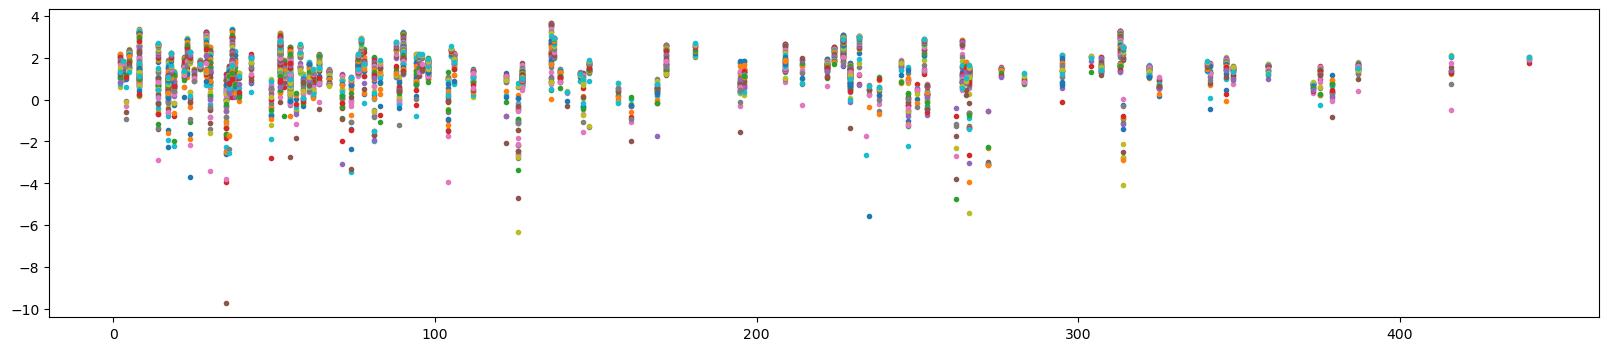

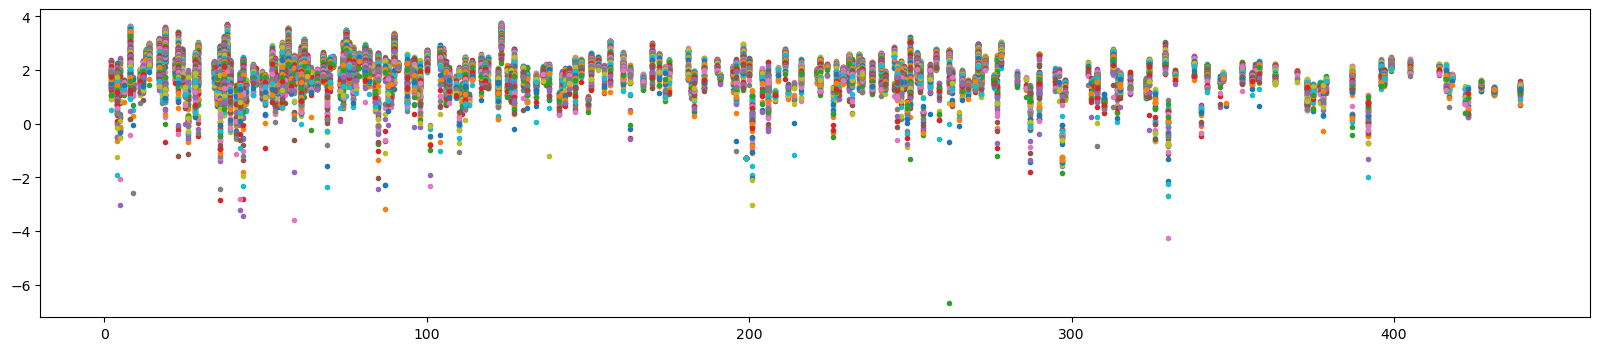

In [19]:
my_genes = ['Arntl','Clock']

for gene in my_genes:
    
    IDX_G = np.where(promoterome.gene == gene)[0]

    for idx_g in IDX_G:
        fig, ax = plt.subplots(1,1,figsize=(20,4))
        
        chip = np.log(X[:,:,idx_g])

        ax.plot(chip,'.')

In [5]:
X.shape

(443, 1000, 28807)

In [10]:
idx_g = np.where(promoterome.gene == 'Clock')[0]

In [12]:
idx_g.shape[0]

1